**Project 1**
(Data Science & Business Analytics)


Prediction using Supervised ML  
What will be predicted score if a student studies for 9.25 hrs/ day?  

BY-Ansh Raj (Electrical Engineering, IIT ROPAR)

**Importing** **Libraries** **and data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
book_data=pd.read_excel(r"C:\Users\SHARAT RAJ\OneDrive - Auronova Consulting Solutions Private Limited\Desktop\Linear_Regression_Task1.xlsx")

In [3]:
book_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
book_data.shape

(25, 2)

In [5]:
book_data.drop_duplicates() #checking presence of duplicates if any?

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
book_data.nunique()

Hours     23
Scores    23
dtype: int64

In [7]:
book_data.dtypes

Hours     float64
Scores      int64
dtype: object

**BASIC** **EDA**

In [8]:
book_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
book_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Hours VS Score')

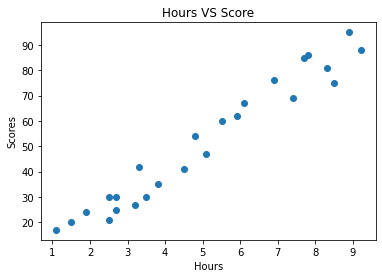

In [10]:
plt.scatter(book_data['Hours'],book_data['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Score')

<AxesSubplot:>

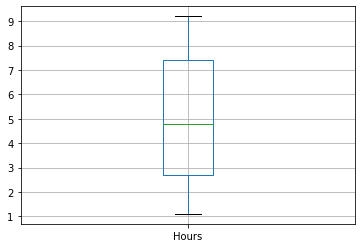

In [11]:
book_data.boxplot(column='Hours') #checking for outliers if present.NO outliers found

C:\Users\SHARAT RAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

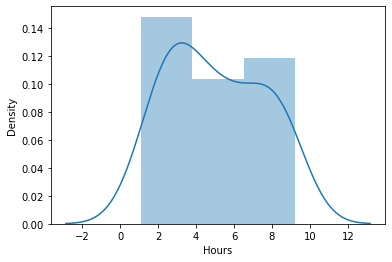

In [12]:
sns.distplot(book_data['Hours']) #Checking for uniformity of distribution

**Separating dependent and independent variables**

In [13]:
X=book_data['Hours']
Y=book_data['Scores']

In [14]:
X.shape

(25,)

In [15]:
# reshaping the vectors for easy calculation 
X=X[:,np.newaxis]
Y=Y[:,np.newaxis]   

C:\Users\SHARAT RAJ\AppData\Local\Temp\ipykernel_19564\3599581095.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=X[:,np.newaxis]
C:\Users\SHARAT RAJ\AppData\Local\Temp\ipykernel_19564\3599581095.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y=Y[:,np.newaxis]


**Preparing** **Data**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2,random_state=42) #splitting data into training and validation set

In [18]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(20, 1)
(5, 1)
(20, 1)
(5, 1)


**Building** **Regression** **Model**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model=LinearRegression()
model.fit(X_train,Y_train)
Pred_val=model.predict(X_val)

In [21]:
Differnce=pd.DataFrame({'original':Y_val.flatten(),'predicted':Pred_val.flatten()}) #differnce between original and predicted values for validation set
Differnce

,original,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [22]:
m=model.coef_

In [23]:
c=model.intercept_

In [24]:
m=m.reshape(1,)
c=c.reshape(1,)

Best fit line

In [25]:
print("Equation of best fit line is: Y = {}*X + {}".format(m.round(2),c.round(2)))

Equation of best fit line is: Y = [9.68]*X + [2.83]


**MAKING PREDICTION FOR GIVEN CASE**

In [26]:
x_test=[[9.25]]

In [27]:
y=model.predict(x_test)

In [28]:
print("The predicted score if a student studies for 9.25 hrs/ day is {}".format(y.round(2).flatten()))

The predicted score if a student studies for 9.25 hrs/ day is [92.39]


**VISUALIZING The BEST FIT LINE**

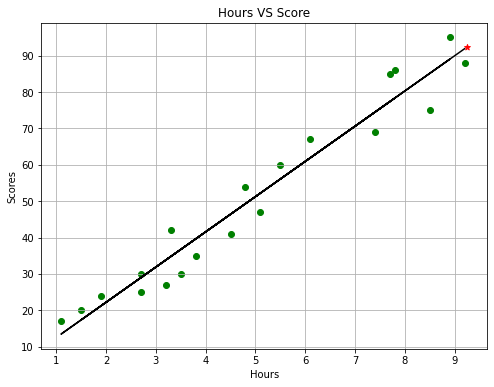

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(X_train,Y_train,color='g') #Training data
plt.scatter(x_test,y,color='r',marker='*')  # Target data
plt.plot(X_train,model.predict(X_train),color='black') #best fit line
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours VS Score')
plt.grid()



**MODEL EVALUATION**

In [30]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [31]:
print('Mean Absolute Error is : {}'.format(mae(Y_val,Pred_val).round(2)))
print('Mean Squared Error is : {}'.format(mse(Y_val,Pred_val).round(2)))
print('Root Mean Squared Error is : {}'.format(np.sqrt(mse(Y_val,Pred_val)).round(2)))


Mean Absolute Error is : 3.92
Mean Squared Error is : 18.94
Root Mean Squared Error is : 4.35


**CONCLUSION**  
The predicted score of a student who studies for ***9.25*** hrs/ day is around **92**.

**THANK** **YOU**

>

